<a href="https://colab.research.google.com/github/kogatomo/optimal-control/blob/main/manipulator_2dof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

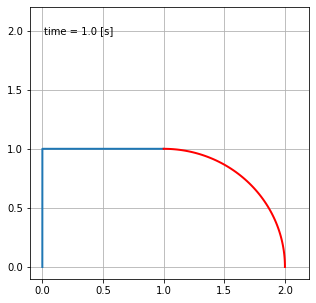

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML  # for Google Colab

def init():
    # make joint angle data
    del(theta1s[:], theta2s[:], x_endpoint[:], y_endpoint[:])
    tf = times[-1]
    for t in times:
        theta1s.append( -(np.pi / 4) * np.cos(np.pi * t / tf) + np.pi / 4)
        theta2s.append( (np.pi / 4) * np.cos(np.pi * t / tf) - np.pi / 4)


def update_animation(frame):
    t, x1, y1, x2, y2 = frame
    # draw manipulator
    manipulator.set_data([0, x1, x2], [0, y1, y2])
    # draw text
    text.set_text(time_template % (t))
    # draw trajectory at the tip of the manipulator
    show_trajectory(x2, y2)


def frame():
    for t, theta1, theta2 in zip(times, theta1s, theta2s):
        x1 = np.cos(theta1)
        y1 = np.sin(theta1)
        x2 = np.cos(theta1+theta2) + x1
        y2 = np.sin(theta1+theta2) + y1
        yield t, x1, y1, x2, y2


def show_trajectory(x, y):
    # make trajectory data at the tip of the manipulator
    x_endpoint.append(x)
    y_endpoint.append(y)
    trajectory.set_data(x_endpoint, y_endpoint)


# Config for figure
fig = plt.figure(figsize=(5, 5), facecolor='white')
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(-0.1, 2.2)
ax.set_ylim(-0.1, 2.2)
ax.grid()
## template for plot
manipulator, = ax.plot(0,0, linewidth=2)
trajectory, = ax.plot([], [], color='red', linestyle='-', linewidth=2)
## template for text
time_template = 'time = %.1f [s]'
text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# Defines
times = np.linspace(0, 1, 101)
## joint angle of each arms
theta1s, theta2s = [], []
## for trajectory at the tip of the manipulator
x_endpoint, y_endpoint = [], []

ani = animation.FuncAnimation(
    fig=fig,
    func=update_animation,
    frames=frame,
    init_func=init,
    interval=50,
    repeat=False)

# display on Google Colab
HTML(ani.to_jshtml())

# save
# ani.save('animation.gif', writer='imagemagick')
# ani.save('animation.mp4', writer='ffmpeg')